<a href="https://colab.research.google.com/github/RaysirChang/Stock_price_PredictionLSTM/blob/master/Stock_price_PredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [ ]:
# fix random seed for reproducibility
np.random.seed(5)

In [ ]:
# file is downloaded from finance.yahoo.com
from pandas_datareader import data as web
import datetime as dt
import fix_yahoo_finance as yf

yf.pdr_override()

In [ ]:
start = dt.datetime(2000, 1, 1)
#end = dt.datetime(2020, 2, 27)
end=dt.datetime.today()
start, end

(datetime.datetime(2000, 1, 1, 0, 0),
 datetime.datetime(2020, 9, 22, 2, 27, 14, 794717))

In [ ]:
df = web.get_data_yahoo(['6282.TW'],start, end)
df.tail()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-16,25.450001,25.600000,25.100000,25.150000,25.150000,5127236
2020-09-17,25.250000,25.700001,25.100000,25.400000,25.400000,7668075
2020-09-18,25.799999,26.100000,25.549999,25.850000,25.850000,9835961
2020-09-21,26.150000,26.350000,25.549999,25.549999,25.549999,10764621
2020-09-22,25.400000,25.400000,24.700001,25.049999,25.049999,3545000


In [ ]:

#input_file='\content\drive\My Drive\Colab Notebooks\6282.TW.csv'

# load the dataset
#df = read_csv(input_file, header=None, index_col=None, delimiter=',')
#df = read_csv(input_file, index_col=None)
#df.head(-5)

In [ ]:
# take close price column['Close']
all_y = df['Close'].values
all_y=all_y[1:]
dataset=all_y.reshape(-1, 1)
all_y.shape, dataset.shape

((4207,), (4207, 1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset[0:5]

array([[0.2960007 ],
       [0.27412298],
       [0.2960007 ],
       [0.2960007 ],
       [0.28579214]])

In [ ]:
# split into train and test sets, 20% test data, 80% training data
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train_size, test_size

(3365, 842)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1, timestep look_back
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(look_back, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=2,validation_data=(testX,testY))

Epoch 1/1000
104/104 - 0s - loss: 0.0097 - val_loss: 9.4191e-04
Epoch 2/1000
104/104 - 0s - loss: 0.0028 - val_loss: 6.6073e-04
Epoch 3/1000
104/104 - 0s - loss: 0.0019 - val_loss: 4.0244e-04
Epoch 4/1000
104/104 - 0s - loss: 0.0017 - val_loss: 3.5751e-04
Epoch 5/1000
104/104 - 0s - loss: 0.0013 - val_loss: 3.7507e-04
Epoch 6/1000
104/104 - 0s - loss: 0.0012 - val_loss: 3.1550e-04
Epoch 7/1000
104/104 - 0s - loss: 0.0012 - val_loss: 2.5268e-04
Epoch 8/1000
104/104 - 0s - loss: 0.0010 - val_loss: 3.7051e-04
Epoch 9/1000
104/104 - 0s - loss: 0.0011 - val_loss: 3.3763e-04
Epoch 10/1000
104/104 - 0s - loss: 0.0010 - val_loss: 1.9542e-04
Epoch 11/1000
104/104 - 0s - loss: 9.8222e-04 - val_loss: 4.4395e-04
Epoch 12/1000
104/104 - 0s - loss: 0.0010 - val_loss: 2.9845e-04
Epoch 13/1000
104/104 - 0s - loss: 9.4390e-04 - val_loss: 3.6568e-04
Epoch 14/1000
104/104 - 0s - loss: 9.0088e-04 - val_loss: 3.8468e-04
Epoch 15/1000
104/104 - 0s - loss: 8.5580e-04 - val_loss: 1.8309e-04
Epoch 16/1000
104/

dict_keys(['loss', 'val_loss'])


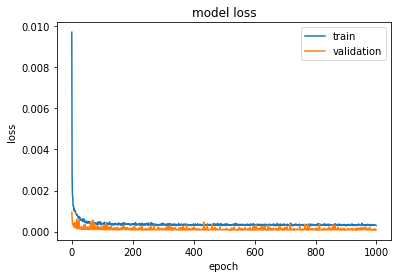

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.54 RMSE
Test Score: 0.40 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

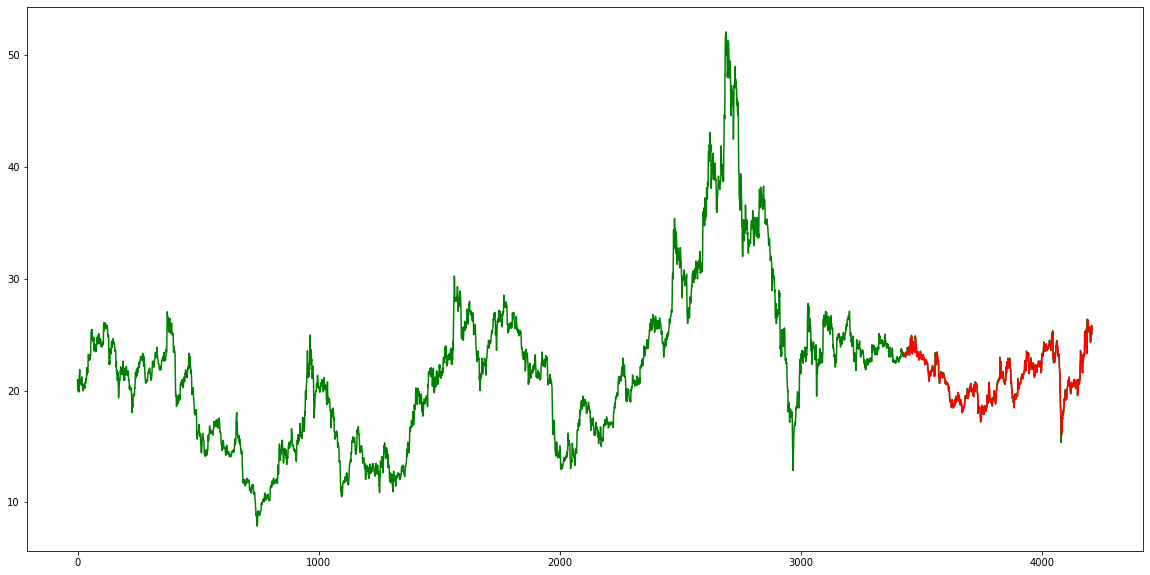

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset),color='green')
#plt.plot(trainPredictPlot, color='blue')
plt.plot(testPredictPlot,color='red')

testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
#print('testPrices:')
#print('testPredictions:')
#print(testPredict[-5])

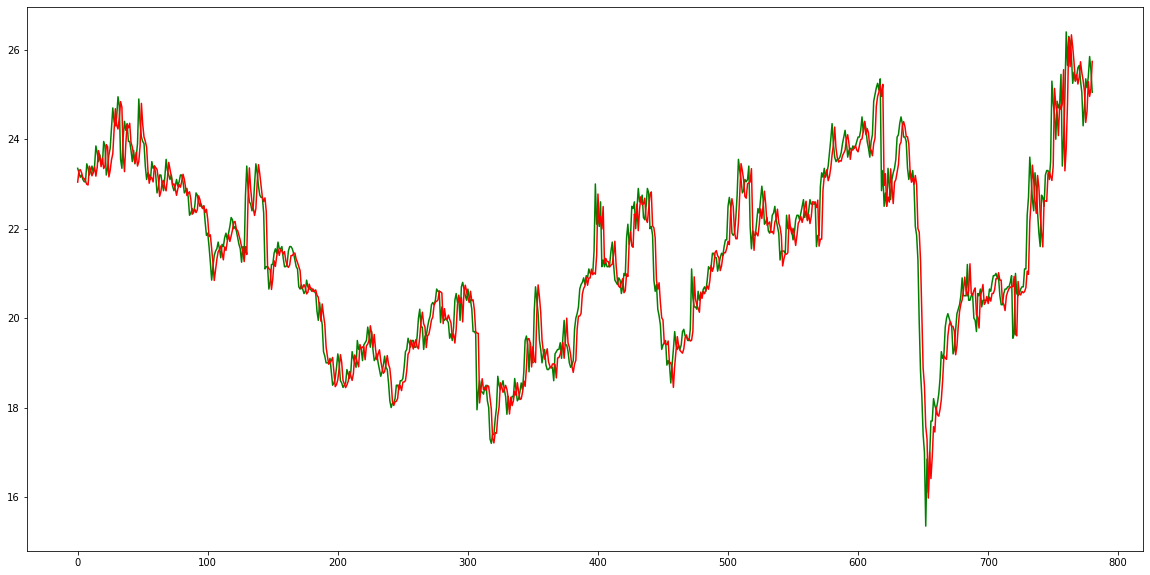

In [ ]:
#detail view for test prediction
plt.figure(figsize=(20,10))
plt.plot(testPrices[-len(testPredict):],color='green')
plt.plot(testPredict,color='red')

In [ ]:
#Predict tomorrow's new price
#newX=dataset[-(look_back+1):-1]
newX=dataset[-(look_back):]
newXS = np.reshape(newX, (1,1,look_back))
newY=model.predict(newXS)
newPredict=scaler.inverse_transform(newY)
print('Today\'s price is: %.2f'%df['Close'].iloc[-1])
print('Predict tomorrow\'s price be: %.2f'%newPredict[0][0])

Today's price is: 25.05
Predict tomorrow's price be: 24.95


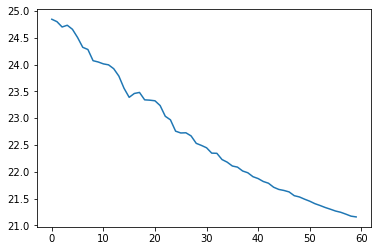

In [ ]:
#predict prices in a period
period=look_back
newXT=newX.copy()
newYT=newY.copy()
new_p=[]
for i in range(period):
  newXT=np.delete(newXT,0)
  newXT=np.append(newXT,newYT)
  newXTS = np.reshape(newXT, (1,1,look_back))
  newYT=model.predict(newXTS)
  invY=scaler.inverse_transform(newYT)
  new_p=np.append(new_p,invY)
  
plt.plot(new_p)  

In [ ]:
print('The pridiction period: %.0f days'%period)
print('The Max price: %.2f'%new_p.max())
print('The Min price: %.2f'%new_p.min())

The pridiction period: 60 days
The Max price: 24.84
The Min price: 21.16
